In [14]:
import pandas as pd
import numpy as np
from scipy import stats as st

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

##### Questão 1. **Teste de Normalidade**
A distribuição abaixo apresenta os tempos, em segundos, que 75 computadores aleatoriamente escolhidos por um cientista da computação gastaram para executar determinada tarefa.

<center>89, 93, 96, 98, 98, 101, 102, 102, 104, 105, 106, 108, 109, 109, 110,<br>
110, 110, 111, 111, 112, 112, 113, 113, 114, 114, 114, 114, 114, 114, 114,<br>
115, 115, 115, 116, 116, 116, 116, 116, 116, 116, 117, 117, 117, 118, 118,<br>
118, 119, 119, 119, 119, 119, 119, 119, 120, 120, 120, 121, 121, 121, 122,<br>
122, 123, 123, 124, 125, 125, 126, 127, 127, 127, 128, 128, 129, 131, 133.</center>

In [15]:
df1 = pd.read_csv('Arquivos_csv_at3/Questao01.csv', header=None)

* Discuta (ao nível de 5%) a normalidade desses dados.

Hipóteses:

$H_0$ : df1 tem distribuição normal.<br>
$H_1$ : df1 não tem distribuição normal.

In [16]:
st.shapiro(df1)

ShapiroResult(statistic=0.9618148803710938, pvalue=0.023390665650367737)

p-valor < $\alpha$, portanto rejeita-se $H_0$

Ao nível de 5%, os dados não assumem distribuição normal.

* Faça um histograma e um boxplot dos dados.

Text(0.5, 1.0, 'Histograma')

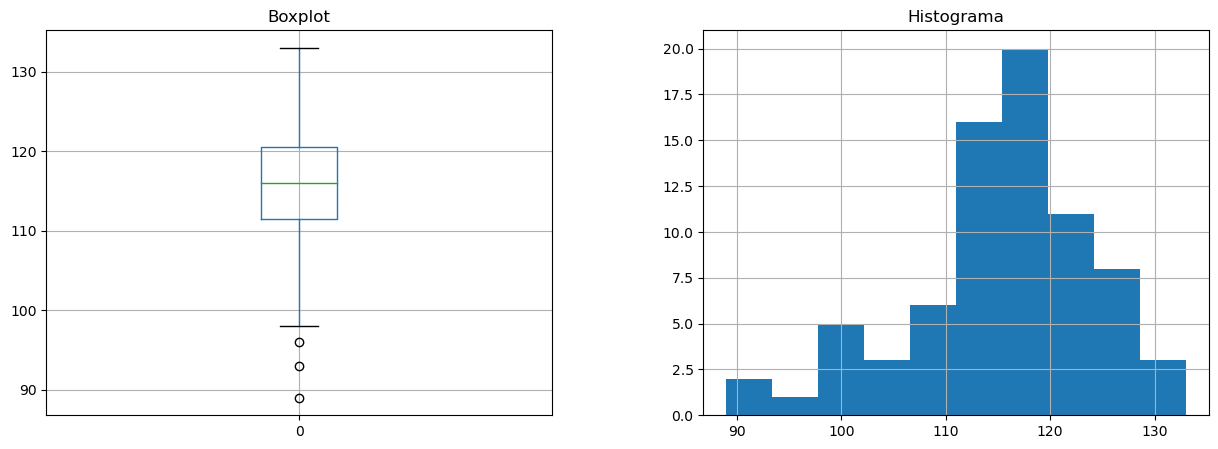

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

df1.boxplot(0, ax=ax[0])
ax[0].set_title('Boxplot')
df1.hist(0, ax=ax[1])
ax[1].set_title('Histograma')

In [18]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3-Q1

O resultado sobre a normalidade se alteraria caso os outliers fossem desconsiderados?

Removendo os outliers.

In [19]:
df1_out = df1.drop(df1[(df1[0]<(Q1.values-(IQR.values*1.5))[0]) | (df1[0]>(Q3.values+(IQR.values*1.5))[0])].index, axis=0)

Hipóteses:

$H_0$ : df1 tem distribuição normal.<br>
$H_1$ : df1 não tem distribuição normal.

In [20]:
st.shapiro(df1_out)

ShapiroResult(statistic=0.9813658595085144, pvalue=0.36372074484825134)

p-valor > $\alpha$, portanto não se rejeita $H_0$.

Ao nível de 5%, os dados sem os outliers assumem distribuição normal.

Text(0.5, 1.0, 'Histograma')

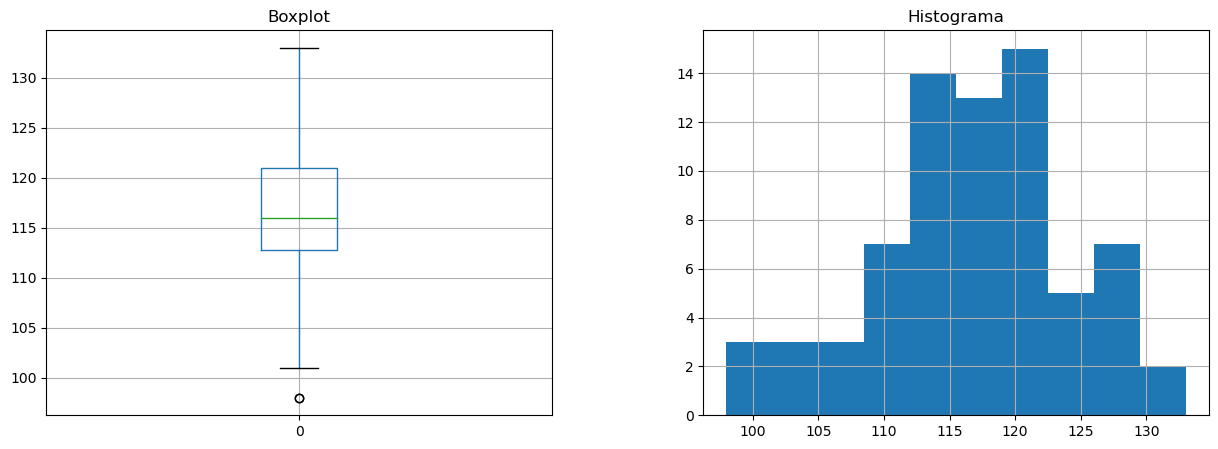

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

df1_out.boxplot(0, ax=ax[0])
ax[0].set_title('Boxplot')
df1_out.hist(0, ax=ax[1])
ax[1].set_title('Histograma')

##### Questão 2. **Teste para média em amostra única**
Cinquenta dados de magnitude foram selecionados aleatoriamente de 10.594 terremotos registrados em um ano, em uma localidade no sul da Califórnia. Estes valores estão exibidos logo abaixo. Os dados são do Southern California Earthquake Data Center (Centro de Dados de Terremotos da Califórnia do Sul). Deseja-se verificar se a população de terremotos tem uma magnitude média maior do que 1,00. Use o nível de significância de 0,05.
<center>
0.70, 2.20, 1.64, 1.01, 1.62, 1.28, 0.92, 1.00, 1.49, 1.42,<br>
0.74, 1.98, 1.32, 1.26, 1.83, 0.83, 1.00, 2.24, 0.84, 1.35,<br>
0.64, 0.64, 2.95, 0.00, 0.99, 1.34, 0.79, 2.50, 1.42, 0.93,<br>
0.39, 1.22, 0.90, 0.65, 1.56, 0.54, 0.79, 1.79, 1.00, 0.40,<br>
0.70, 0.20, 1.76, 1.46, 0.40, 1.25, 1.44, 1.25, 1.25, 1.39.
</center>

* Use um teste t para essa análise.
* Lembre-se que uma premissa desse teste é que os dados sejam normalmente distribuídos.

In [22]:
df2 = pd.read_csv('Arquivos_csv_at3/Questao02.csv', header=None)

Hipóteses:

$H_0$ : df1 tem distribuição normal.<br>
$H_1$ : df1 não tem distribuição normal.



In [23]:
st.shapiro(df2)

ShapiroResult(statistic=0.9725326299667358, pvalue=0.2925371527671814)

p-valor > $\alpha$, portanto não se rejeita $H_0$.


Ao nível de 5%, não se rejeita a hipótese nula.

Hipóteses:

$H_0$ : $\mu_{df2}$ = 1.<br>
$H_1$ : $\mu_{df2}$ < 1.



In [24]:
st.ttest_1samp(df2, popmean=1, alternative='less')

TtestResult(statistic=array([2.21770302]), pvalue=array([0.98437841]), df=array([49]))

p-valor > $\alpha$, portanto não se rejeita $H_0$.

Ao nível de 5%, não se rejeita a hipótese nula.

##### **Questão 3. Teste para proporção em amostra única**
Quando Mendel realizou seus famosos experimentos sobre genética, uma amostra de descendentes
consistia em 428 ervilhas verdes e 152 ervilhas amarelas. Teste a um nível de significância de 5%, a
afirmativa de Mendel de que, sob as mesmas circunstâncias, 25% das ervilhas descendentes seriam
amarelas.


In [25]:
e_verde = 428
e_amarela = 152

Hipóteses:

$H_0$ : A proporção de ervilhas amarelas será 25% da população.<br>
$H_1$ : A proporção de ervilhas amarelas é diferente de 25% da população.

In [26]:
st.binom_test(x=e_amarela, n=e_verde, p=0.25, alternative='two-sided')

1.3915325800250046e-06

p-valor < $\alpha$, portanto rejeita-se $H_0$.

Ao nível de 5%, a proporção de ervilhas amarelas é diferente de 25% da população.

##### **Questão 4. Teste para comparar médias de duas amostras pareadas**
O gerente de uma empresa de táxi está tentando decidir se o uso de novo tipo de pneus aumenta a economia de combustível de sua frota. Doze carros foram equipados com os novos pneus e conduzidos por um curso de teste pré-estabelecido. Sem mudar de motorista, os mesmos carros foram então equipados com pneus dos mesmos tipos anteriores e conduzidos novamente durante o curso de teste. O consumo de gasolina, em quilômetros por litro, foi registrado como segue:

In [27]:
df4 = pd.read_csv('Arquivos_csv_at3/Questao04.csv', sep=';', index_col=0)
df4.dropna()

,Km/L pneus tradicionais,Km/L pneus novos
Carro,,
1,4.2,4.1
2,4.7,4.9
3,6.6,6.2
4,7.0,6.9
5,6.7,6.8
6,4.5,4.4
7,5.7,5.7
8,6.0,5.8
9,7.4,6.9



Assumindo que as populações sejam normalmente distribuídas, pode-se concluir que carros equipados com os novos pneus fornecem maior economia de combustível que os antigos? (Use 5% de significância).

Hipóteses:

$H_0$ : $\mu_{pneus-tradicionais}$ = $\mu_{pneus-novos}$.<br>
$H_1$ :  $\mu_{pneus-tradicionais}$ > $\mu_{pneus-novos}$.

In [28]:
st.ttest_rel(a=df4['Km/L pneus tradicionais'], b=df4['Km/L pneus novos'], alternative='less')

TtestResult(statistic=0.6606339735160173, pvalue=0.7387792147442769, df=11)

p-valor > $\alpha$, portanto não se rejeita $H_0$

Ao nível de 5%, carros equipados com os novos pneus fornecem maior economia de combustível que os antigos.

#### **Questão 5. Teste para comparar médias de duas amostras independentes**
Em um estudo realizado na numa certa cidade, os níveis de ácido ascórbico plasmático de mulheres grávidas foram comparados para fumantes versus não-fumantes. Trinta e duas mulheres nos últimos três meses de gravidez, livres de grandes distúrbios de saúde e com idades entre 15 e 32 anos, foram selecionadas para o estudo. Antes da coleta de 20 ml de sangue, as participantes foram orientadas a evitar o café da manhã, abandonar seus suplementos vitamínicos e evitar alimentos ricos em ácido ascórbico.

A partir das amostras de sangue, foram determinados os seguintes valores de ácido asc´orbico plasm´atico, em miligramas por 100 mililitros:

In [29]:
df5 = pd.read_csv('Arquivos_csv_at3/Questao05.csv')
df5

,Não Fumantes,Fumantes
0,0.97,0.48
1,0.72,0.71
2,1.00,0.98
3,0.81,0.68
4,0.62,1.18
5,1.32,1.36
6,1.24,0.78
7,0.99,1.64
8,0.90,NaN
9,0.74,NaN


Existem provas suficientes para concluir que há uma diferença entre os níveis de ácido ascórbico no plasma de fumantes e não fumantes?

Obs.: Não se esqueça que existe diferença na estatística de teste caso as variâncias das populações das duas amostras sejam iguais ou não. Portanto, não deixe de verificar (testar) a igualdade ou não das variâncias populacionais antes de testar qualquer coisa sobre suas médias.


Hipóteses:

$H_0$ : $\sigma^2_{não-fumantes}$ = $\sigma^2_{fumantes}$.<br>
$H_1$ :  $\sigma^2_{não-fumantes}$ $\neq$ $\sigma^2_{fumantes}$.

In [72]:
st.levene(df5['Não Fumantes'], df5.dropna()['Fumantes'])

LeveneResult(statistic=4.763736854771367, pvalue=0.037612048878156557)

p-valor < $\alpha$, portanto rejeita-se $H_0$.

Ao nível de 5%, pode se afirmar que as variâncias são diferentes.

Hipóteses:

$H_0$ : $\mu_{não-fumantes}$ = $\mu_{fumantes}$.<br>
$H_1$ :  $\mu_{não-fumantes}$ $\neq$ $\mu_{fumantes}$.

In [73]:
st.ttest_ind(a=df5['Fumantes'], b=df5['Não Fumantes'], equal_var=False, nan_policy='omit')

TtestResult(statistic=0.5039452833843957, pvalue=0.6269461493210902, df=8.606301924175254)

p-valor > $\alpha$, portanto não se rejeita $H_0$.

Não existem provas suficientes para concluir que há uma diferença entre os níveis de ácido ascórbico no plasma de fumantes e não fumantes.

#### **Questão 6. Teste para comparar médias de duas amostras independentes**
Em um experimento de adubação de pastagens foram comparadas dois tipos de adubação química e orgânica. Seja Xq a altura das plantas adubadas com adubo químico e Xo a altura das adubadas com adubo orgânico, de modo que ambas tenham distribuição aproximadamente normal. Observaram-se 12 parcelas de Xq e 10 parcelas de Xo. Os resultados são apresentados a seguir:

In [75]:
df6 = pd.read_csv('Arquivos_csv_at3/Questao06.csv', sep=';', header=None, index_col=0)
df6 = pd.DataFrame.transpose(df6)
df6

,Quimica,Organica
1,67.1,82.7
2,56.4,71.8
3,63.5,70.0
4,60.0,71.8
5,62.5,78.0
6,59.6,69.6
7,70.0,75.8
8,67.9,62.8
9,69.9,72.4
10,74.1,74.9


Verificar se, ao nível de 5%, existe diferença significativa entre as alturas das plantas em relação ao tipo de adubo utilizado na pastagem. Caso exista, verifique qual adubo é mais indicado para obter maiores alturas dessa planta.

Obs.: Não se esqueça que existe diferença na estatística de teste caso as variâncias das populações das duas amostras sejam iguais ou não. Portanto, não deixe de verificar (testar) a igualdade ou não das variâncias populacionais antes de testar qualquer coisa sobre suas médias.

Hipóteses:

$H_0$ : $\sigma^2_{orgânico}$ = $\sigma^2_{químico}$.<br>
$H_1$ :  $\sigma^2_{orgânico}$ $\neq$ $\sigma^2_{químico}$.

In [377]:
st.levene(df6['Quimica'], df6.dropna()['Organica'])

LeveneResult(statistic=0.342755497869498, pvalue=0.5647912035862845)

p-valor > $\alpha$, portanto não se rejeita $H_0$

Hipóteses:

$H_0$ : $\mu_{orgânico}$ = $\mu_{químico}$.<br>
$H_1$ :  $\mu_{orgânico}$ $\neq$ $\mu_{químico}$.

In [381]:
st.ttest_ind(a=df6['Quimica'], b=df6['Organica'], equal_var=True, nan_policy='omit')

TtestResult(statistic=-3.6225129552100293, pvalue=0.0016971984654230593, df=20.0)

p-valor < $\alpha$, portanto rejeita-se $H_0$.

Ao nível de 5%, existe diferença significativa entre as alturas das plantas em relação ao tipo de adubo utilizado na pastagem.

#### **Questão 7. Teste Qui-quadrado para aderência** 
O tempo residual do efeito de um agrotóxico está sendo analisado. Estudos anteriores com produtos similares, indicam que o modelo Exponencial com média de 3 dias poderia ser adequado. Qual a conclusão, ao nível de 5%, se a análise em laboratório de uma amostra de 300 aplicações do agrotóxico forneceu os seguintes tempos residuais:

In [153]:
df7 = pd.read_csv('Arquivos_csv_at3/Questao07.csv', sep=';', index_col=0)
df7 = pd.DataFrame.transpose(df7)
df7

Faixa de Tempo,Frequencia
"[0,1)",89
"[1,2)",60
"[2,3)",43
"[3,4)",40
"[4,5)",25
"[5,6)",22
"[6,?)",21


* Lembre-se que para esse teste basta comparar o vetor de frequências da tabela com as probabilidades da distribuição em teste para os mesmos intervalos definidos na tabela.

Para uma distribuição exponencial:

f(x) = $\lambda e^{-\lambda x}$

$E(X) = \frac{1}{\lambda}$


Gerando a distribuição exponencial e calculando a pdf.

In [296]:
f_exp = np.histogram(st.expon.rvs(scale=3, size=300, random_state=1), bins=7)[0]/300
f_exp

array([0.53666667, 0.26666667, 0.10666667, 0.05333333, 0.02666667,
       0.00666667, 0.00333333])

Calculando a pdf para os dados observados.

In [297]:
f_obs = df7['Frequencia'].values/300
f_obs

array([0.29666667, 0.2       , 0.14333333, 0.13333333, 0.08333333,
       0.07333333, 0.07      ])

Hipóteses:

$H_0$ : A distribuição dos dados observados se assemelha a uma distribuição exponencial com média 3. <br>
$H_1$ : A distribuição dos dados observados é diferente uma distribuição exponencial com média 3.

In [298]:
st.chisquare(f_obs=f_obs, f_exp=f_exp)

Power_divergenceResult(statistic=2.377016692546584, pvalue=0.8819695790785558)

p-valor > $\alpha$, portanto não se rejeita $H_0$

#### **Questão 8. Teste Qui-quadrado para independência de duas variáveis qualitativas**
Estudando-se os índices de natalidade em uma certa cidade, levantou-se a questão se a renda
familiar poderia ter alguma relação com o número de filhos da família. Uma amostra de 257 famílias
foi observada e os dados coletados estão apresentados na tabela abaixo.

In [304]:
df8 = pd.read_csv('Arquivos_csv_at3/Questao08.csv', sep=';', index_col=0)
df8

,0,1,2,>2,Total
Renda \ Filhos,,,,,
menos de 2000,15,27,50,43,135
2000 a 5000,25,37,12,8,82
5000 ou mais,8,13,9,10,40
Total,48,77,71,61,257


Verifique se existe dependência entre o número de filhos e a renda familiar, a um nível de 5%.

Hipóteses:

$H_0$ : Não existe dependência entre o número de filhos e a renda familiar. <br>
$H_1$ : Existe dependência entre o número de filhos e a renda familiar.

In [327]:
st.chi2_contingency(df8.iloc[:-1,:-1])

Chi2ContingencyResult(statistic=41.39062289108908, pvalue=2.4252913874296493e-07, dof=6, expected_freq=array([[25.21400778, 40.44747082, 37.29571984, 32.04280156],
       [15.3151751 , 24.56809339, 22.6536965 , 19.46303502],
       [ 7.47081712, 11.9844358 , 11.05058366,  9.49416342]]))

p-valor < $\alpha$, portanto rejeita-se $H_0$.

Ao nível de 5%, existe dependência entre o número de filhos e a renda familiar.

#### **Questão 9. Teste Qui-quadrado para homogeneidade de populações**
A reação ao tratamento por quimioterapia foi estudada em quatro grupos de pacientes com câncer. Retirou-se uma amostra de pacientes de cada grupo e classificou-se a reação em três categorias: pouca, média e alta. Teste, ao nível de 5%, se todos os tipos de câncer reagem da mesma maneira.

In [316]:
df9 = pd.read_csv('Arquivos_csv_at3/Questao09.csv', sep=';', index_col=0)
df9

,Pouca,Media,Alta,Total
Cancer \ Reação,,,,
Tipo I,51,33,16,100
Tipo II,58,29,13,100
Tipo III,48,42,30,120
Tipo IV,26,38,16,80


Hipóteses:

$H_0$ : Todas as probabilidades das ocorrências nas colunas são iguais. <br>
$H_1$ : Pelo menos uma das probabilidades das ocorrências nas colunas é diferente.

In [336]:
st.chi2_contingency(df9.iloc[:,:-1])

Chi2ContingencyResult(statistic=17.17272377434003, pvalue=0.008668986842705801, dof=6, expected_freq=array([[45.75, 35.5 , 18.75],
       [45.75, 35.5 , 18.75],
       [54.9 , 42.6 , 22.5 ],
       [36.6 , 28.4 , 15.  ]]))

p-valor < $\alpha$, portanto rejeita-se $H_0$.

Ao nível de 5%, pelo menos uma das probabilidades das ocorrências nas colunas é diferente.

Se, por curiosidade, você retirasse um desses grupos (o que tiver comportamento proporcionalmente diferente dos demais) e refizer o teste? Poderia ter um outro resultado?

In [337]:
st.chi2_contingency(df9.iloc[:,:-1])[3]

array([[45.75, 35.5 , 18.75],
       [45.75, 35.5 , 18.75],
       [54.9 , 42.6 , 22.5 ],
       [36.6 , 28.4 , 15.  ]])

In [351]:
df9_h = df9.drop(['Tipo II'])
df9_h

,Pouca,Media,Alta,Total
Cancer \ Reação,,,,
Tipo I,51,33,16,100
Tipo III,48,42,30,120
Tipo IV,26,38,16,80


In [352]:
st.chi2_contingency(df9_h.iloc[:,:-1])

Chi2ContingencyResult(statistic=8.803697402226666, pvalue=0.06619783939734217, dof=4, expected_freq=array([[41.66666667, 37.66666667, 20.66666667],
       [50.        , 45.2       , 24.8       ],
       [33.33333333, 30.13333333, 16.53333333]]))

Com a remoção de um dos grupos, passa-se a não rejeitar a $H_0$.

#### **Questão 10. ANOVA**
No conjunto de dados abaixo estão listadas as quantidades de nicotina (mg por cigarro) encontradas em amostras de três tipos de cigarros: cigarros tamanho *king*, cigarros de 100mm mentolados e nos cigarros de 100mm sem mentol. Os cigarros tamanho *king* são sem filtro, sem mentol e são não light. Os cigarros de 100mm mentolados são com filtro e não light. Os cigarros de 100 mm sem
mentol têm filtro e são não light. 

Use o nível de significância de 0,05 (5%) para testar a afirmativa de que as três categorias de cigarros resultam na mesma quantidade média de nicotina.

In [355]:
df10 = pd.read_csv('Arquivos_csv_at3/Questao10.csv', sep=';')
df10

,KING,MENTH,NonMENTH
0,1.1,1.1,0.4
1,1.7,0.8,1.0
2,1.7,1.0,1.2
3,1.1,0.9,0.8
4,1.1,0.8,0.8
5,1.4,0.8,1.0
6,1.1,0.8,1.1
7,1.4,0.8,1.1
8,1.0,0.9,1.1
9,1.2,0.8,0.8


Hipóteses:

$H_0$ : As médias de nicotina por cigarro ($mg/cigarro$) são todas iguais. <br>
$H_1$ : Pelo menos uma das médias é diferente.

In [363]:
st.f_oneway(df10['KING'], df10['MENTH'], df10['NonMENTH'])

F_onewayResult(statistic=18.993119266055043, pvalue=2.3756873398748116e-07)

p-valor < $\alpha$, portanto rejeita-se $H_0$.

Ao nível de 5%, pelo menos uma das médias é diferente.

Uma vez que apenas os cigarros tamanho *king* são sem filtro, os filtros parecem fazer alguma diferença?

Hipóteses:

$H_0$ : $\sigma^2_{KING}$ = $\sigma^2_{MENTH}$ = $\sigma^2_{NONMENTH}$.<br>
$H_1$ :  $\sigma^2_{KING}$ $\neq$ $\sigma^2_{MENTH}$ $\neq$ $\sigma^2_{NONMENTH}$.

In [364]:
st.levene(df10['KING'], df10['MENTH'], df10['NonMENTH'])

LeveneResult(statistic=0.11684210526315772, pvalue=0.8898940196862081)

p-valor > $\alpha$, portanto não se rejeita $H_0$.

Hipóteses:

$H_0$ : $\mu_{KING}$ = $\mu_{MENTH}$.<br>
$H_1$ :  $\mu_{KING}$ < $\mu_{MENTH}$.

In [383]:
st.ttest_ind(a=df10['KING'], b=df10['MENTH'], equal_var=True, nan_policy='omit', alternative='less')

TtestResult(statistic=5.7116555261638045, pvalue=0.9999996554246183, df=48.0)

Hipóteses:

$H_0$ : $\mu_{KING}$ = $\mu_{NonMENTH}$.<br>
$H_1$ :  $\mu_{KING}$  < $\mu_{NonMENTH}$.

In [368]:
st.ttest_ind(a=df10['KING'], b=df10['NonMENTH'], equal_var=False, nan_policy='omit', alternative='less')

TtestResult(statistic=4.999279279275535, pvalue=0.9999959279788885, df=47.8163273313838)

Para ambos os casos p-valor > $\alpha$, portanto não se rejeita $H_0$.

Portanto, a um nível de 5% os filtros parecem fazer alguma diferença.

#### **Questão 11. ANOVA**
Qual sua cor de M&M’s preferida? Você já se perguntou se existe diferença nos pesos dos M&M’s de acordo com a cor de cada um?

Para verificar se essa diferença existe ou não, uma amostra de M&M’s foi selecionada, os doces foram categorizados de acordo com suas cores e seus pesos foram observados. Os resultados estão listados na tabela abaixo.

In [385]:
df11 = pd.read_csv('Arquivos_csv_at3/Questao11.csv', sep=';')
df11

,RED,ORANGE,YELLOW,BROWN,BLUE,GREEN
0,0.751,0.735,0.883,0.696,0.881,0.925
1,0.841,0.895,0.769,0.876,0.863,0.914
2,0.856,0.865,0.859,0.855,0.775,0.881
3,0.799,0.864,0.784,0.806,0.854,0.865
4,0.966,0.852,0.824,0.840,0.810,0.865
5,0.859,0.866,0.858,0.868,0.858,1.015
6,0.857,0.859,0.848,0.859,0.818,0.876
7,0.942,0.838,0.851,0.982,0.868,0.809
8,0.873,0.863,NaN,NaN,0.803,0.865
9,0.809,0.888,NaN,NaN,0.932,0.848


Discuta, ao nível de 5%, se existe diferença no peso médio de M&M’s de acordo com as cores.

Hipóteses:

$H_0$ : A média de pesos de todas as cores é igual.<br>
$H_1$ : Pelo menos uma das médias de pesos de uma das cores é diferente.

In [396]:
st.f_oneway(df11['BLUE '], df11.dropna()['BROWN'], df11.dropna()['GREEN'], df11.dropna()['ORANGE'], df11.dropna()['YELLOW'], df11.dropna()['RED'])

F_onewayResult(statistic=1.1334947182816728, pvalue=0.3524426492831921)

p-valor > $\alpha$, portanto não se rejeita $H_0$.

#### **Questão 12. Regressão múltipla**
Os dados abaixo trazem informações diversas e algumas medidas de indivíduos. Esses dados foram utilizados para um estudo de relação entre altura das pessoas e o tamanho dos pés e sapatos, aplicados à ciência forense (Estimation of Stature from Foot and Shoe Length: Applications in Forensic Science).

Estabeleça um modelo de regressão múltipla para a variável altura em função de todas as outras covariáveis. Feito isso, verifique quais covariáveis são significativas para o modelo e o aprimore, se for o caso. Tente obter o melhor modelo possível, que seja capaz de explicar razoavelmente bem a variação de alturas entre indivíduos.

In [461]:
df12 = pd.read_csv('Arquivos_csv_at3/Questao12.csv', sep=';')

In [462]:
df12['Sexo'] = np.where(df12['Sexo'] == 'F', 1, 0)

In [463]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [474]:
y = df12.iloc[:,-1]
X_0 = df12.iloc[:,:-1]

X2_0 = sm.add_constant(X_0)
linreg = sm.OLS(y, X2_0)
reg = linreg.fit()

In [475]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                 Altura   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     24.69
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           2.02e-10
Time:                        20:01:29   Log-Likelihood:                -118.00
No. Observations:                  40   AIC:                             248.0
Df Residuals:                      34   BIC:                             258.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           83.4761     28.782      2.900   

In [482]:
y = df12.iloc[:,-1]
X_1 = df12.iloc[:,:-1]
X_1 = X_1.drop(['Sexo', 'Num Sapato'], axis=1)
X2_1 = sm.add_constant(X_1)
linreg = sm.OLS(y, X2_1)
reg = linreg.fit()

In [483]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                 Altura   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     41.64
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           8.53e-12
Time:                        20:20:53   Log-Likelihood:                -118.70
No. Observations:                  40   AIC:                             245.4
Df Residuals:                      36   BIC:                             252.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           63.4355     10.604      5.982   